In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import sklearn
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.array([4,5,2,3,1])
b = np.array([2,1,4,3,5])

In [3]:
pers_corr, _ = stats.pearsonr(a,b)

In [4]:
print(pers_corr)

-1.0


In [5]:
url = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
data = pd.read_csv(url)

In [6]:
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [7]:
data.shape

(51, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         51 non-null     object 
 1   metro_res     51 non-null     float64
 2   white         51 non-null     float64
 3   hs_grad       51 non-null     float64
 4   poverty       51 non-null     float64
 5   female_house  51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [9]:
data.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


In [10]:
for c in data.columns:
    print(c, ': ',data[c].isna().sum())

state :  0
metro_res :  0
white :  0
hs_grad :  0
poverty :  0
female_house :  0


In [11]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,metro_res,white,hs_grad,poverty,female_house
metro_res,1.000000,-0.342442,0.018110,-0.204235,0.300062
white,-0.342442,1.000000,0.238156,-0.308520,-0.751394
hs_grad,0.018110,0.238156,1.000000,-0.746858,-0.611867
poverty,-0.204235,-0.308520,-0.746858,1.000000,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1.000000


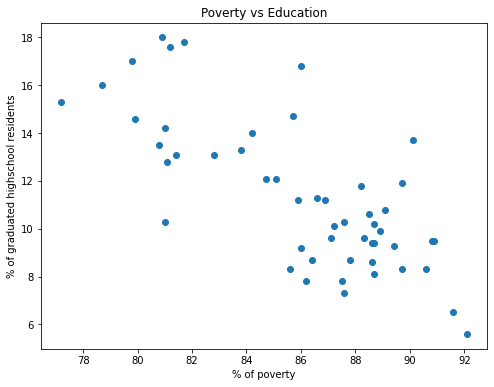

In [12]:
pov = np.array(data['poverty'])
grad = np.array(data['hs_grad'])

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xlabel('% of poverty')
ax.set_ylabel('% of graduated highschool residents')
ax.set_title('Poverty vs Education', )

ax.scatter(grad, pov)




plt.show()

lets calculate b0 and b1 for our regression line:


In [13]:
std_pov = np.std(data['poverty'])
std_grad = np.std(data['hs_grad'])
pov_grad_corr, _ = stats.pearsonr(data['poverty'], data['hs_grad'])

In [14]:
b1 = std_pov/std_grad*pov_grad_corr
print(b1)

-0.6212167177940107


In [15]:
b0 = data['poverty'].mean()-b1*data['hs_grad'].mean()
print(b0)

64.78096577010209


In [16]:
stats.linregress(data['hs_grad'], data['poverty'])

LinregressResult(slope=-0.6212167177940106, intercept=64.78096577010209, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.0790164710017928)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(grad, pov)

ValueError: Expected 2D array, got 1D array instead:
array=[79.9 90.6 83.8 80.9 81.1 88.7 87.5 88.7 86.  84.7 85.1 88.5 88.2 85.9
 86.4 89.7 88.6 82.8 79.8 86.6 87.6 87.1 87.6 91.6 81.2 88.3 90.1 90.8
 85.6 92.1 86.2 81.7 84.2 81.4 89.7 87.2 85.7 86.9 86.  81.  80.8 88.7
 81.  77.2 89.4 88.9 87.8 89.1 78.7 88.6 90.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
from scipy.stats import chisquare

In [23]:
chisquare([18,55,27], f_exp=[25,50,25])

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

In [17]:
def calc_ols_statmodels(x, y):
    x_for_ols = sm.add_constant(x)
    model = sm.OLS(y, x_for_ols)
    results = model.fit()
    print('statsmodels: ', results.summary())
    
    # regression formula --------------------------------
    if results.params[1]>0:
        sign="+"
    else:
        sign="-"
    formula = f"y = {results.params[0]:.2f} {sign} {np.abs(results.params[1]):.2f}*x"
    print("-"*80)
    print("OLS Formula: ", formula)

    # Graphics ================================
    fig = plt.figure(figsize=(16,9), constrained_layout=True)
    gs = fig.add_gridspec(ncols=3, nrows=2)
    ax_main = fig.add_subplot(gs[0,:])
    ax_resid = fig.add_subplot(gs[1,0])
    ax_hist = fig.add_subplot(gs[1,1])
    ax_qqplot = fig.add_subplot(gs[1,2])

    # Scatterplot -----------------------------
    sns.scatterplot(x=x, y=y, ax=ax_main, label="fact")
    ax_main.plot(x, results.predict(), color='red', alpha=0.5, label = formula)
    ax_main.set_title(f"Regression scatterplot. R2={results.rsquared:.2f}", fontsize=14)
    ax_main.legend()

    # Residuals -------------------------------
    sns.scatterplot(x=x, y=results.resid, ax=ax_resid, label="residuals")
    ax_resid.hlines(0, x.min(), x.max(), linestyle='--', colors='red', alpha=0.5)
    ax_resid.set_title(f"Residuals vs Fitted values", fontsize=14)

    # Hist -------------------------------------
    sns.histplot(results.resid, ax=ax_hist,)
    ax_hist.set_title("Histogram of Residuals", fontsize=14)
    # ax_hist.legend()

    # QQ Plot ----------------------------------
    # sm.qqplot(results.resid, ax=ax_qqplot) # не такой секси
    stats.probplot(results.resid, dist="norm", plot=ax_qqplot)
    ax_qqplot.set_title("Normal QQ-Plot of Residuals", fontsize=14)

    plt.show()

statsmodels:                              OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.11e-10
Time:                        12:29:15   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7810      6.803      

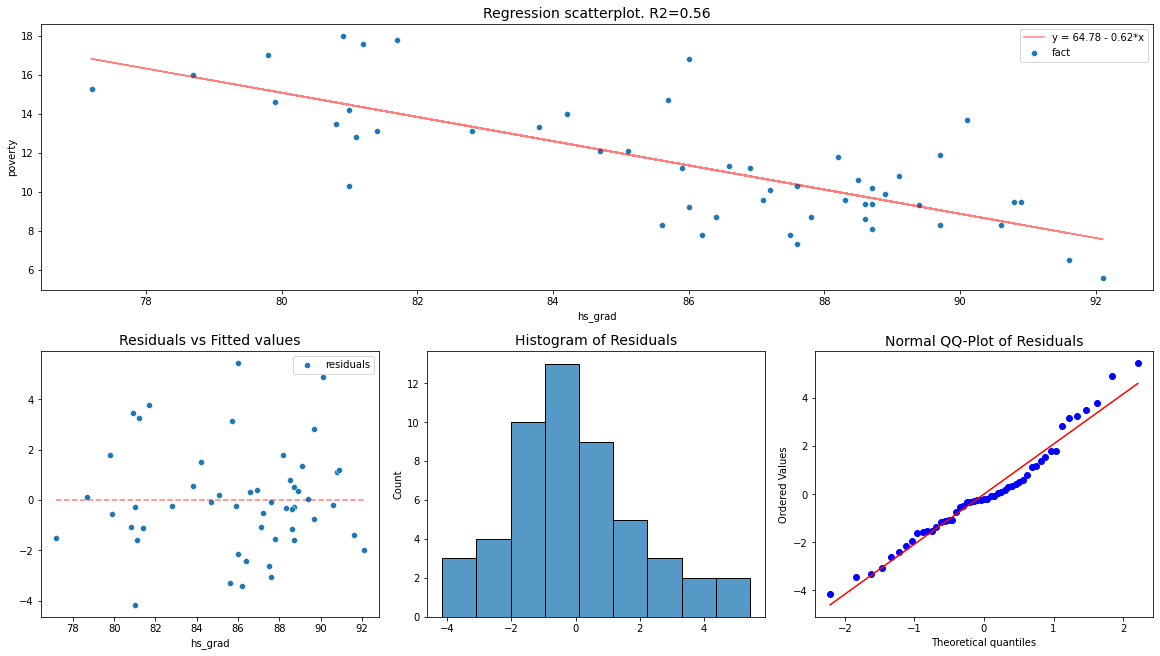

In [18]:
calc_ols_statmodels(data['hs_grad'], data['poverty'])

In [19]:
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [31]:
X = data.drop(['poverty','state'], axis=1)

In [26]:
y = data['poverty']

In [27]:
from sklearn import linear_model

In [29]:
regr = linear_model.LinearRegression()

In [32]:
regr.fit(X, y)

LinearRegression()

In [34]:
X.columns

Index(['metro_res', 'white', 'hs_grad', 'female_house'], dtype='object')

In [33]:
regr.coef_

array([-0.05632285, -0.04814449, -0.55471329,  0.05054296])

In [36]:
regr.intercept_

66.4765254053879

In [43]:
regr.score(X, y)

0.6415759298804308

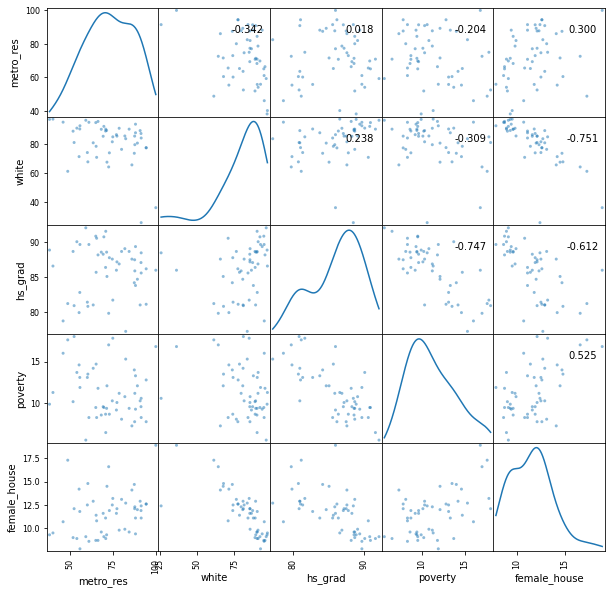

In [44]:
axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [46]:
X_1 = X.drop('female_house', axis=1)

In [47]:
regr_cut = linear_model.LinearRegression()

In [49]:
regr_cut.fit(X_1, y)

LinearRegression()

In [50]:
regr_cut.coef_

array([-0.05553189, -0.05332706, -0.56972444])

In [51]:
regr_cut.intercept_

68.72201512140462